Problem Statement:Simple csv depicting area and price.
Need to predict the price of a given area after building the model.

In [16]:
#Importing the packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [3]:
#loading the data
data = pd.read_csv('HomePrice1.csv')
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
# draw some plot and run some python code to check the distribution of data
#This dataset is very less(just for concept)
#But this are the 1st things need to be done in any dataset to understand the data properly

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
area     5 non-null int64
price    5 non-null int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [5]:
data.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


E:\AnacondaInstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


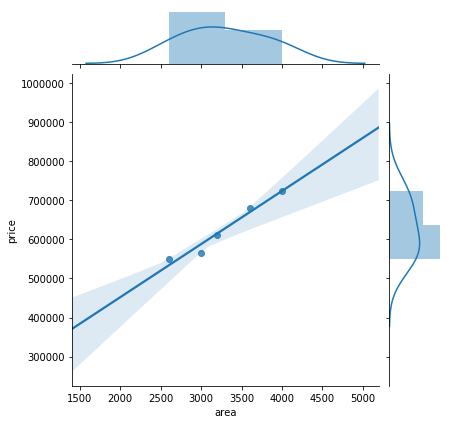

In [6]:
#plotting
sns.jointplot("area", "price", data=data, kind='reg')

E:\AnacondaInstall\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


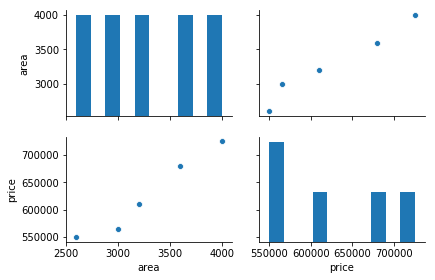

In [7]:
sns.pairplot(data, size = 2, aspect = 1.5)

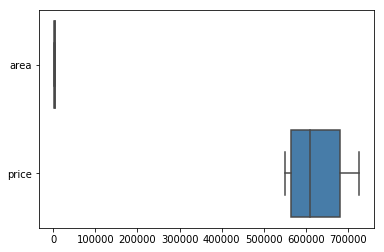

In [15]:
 sns.boxplot(data=data, orient="h", palette="Set1")

In [17]:
data.corr()

,area,price
area,1.000000,0.978994
price,0.978994,1.000000


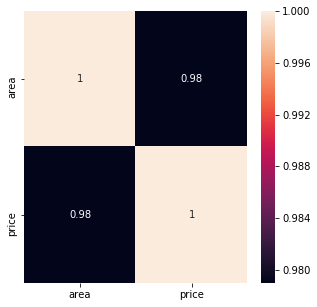

In [27]:
plt.figure(figsize=(5, 5))

sns.heatmap( data.corr(),annot=True,)

So from the above plot and analysis it is clear there is a linear relation between target variable(TA) and Independent Variable.(IV/EV).And they are highly corelated.
Here only one IV is presnet so it is Single Variable Snalysis.
TA: price
IV/EV: area

EDA is not needed here as the sample size is very very less(only for understanding).No outlinears,No missing values.
Else next step would have come EDA to clean the data.

In [257]:
#Preparing X and y using pandas
#Here I am going to perform two ways(without standardization and with standardization)


#Here will go for without standardization 
#as data is very less some of the values will not come properly


feature_cols = ['area']                # create a Python list of feature names
X = data[feature_cols]                                     # use the list to select a subset of the original DataFrame-+
X

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [258]:
y = data.price
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [259]:
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(5, 1)
<class 'pandas.core.series.Series'>
(5,)


In [260]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20,random_state=1)

In [261]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (4, 1)
y_train shape:  (4,)

Test cases as below
X_test shape:  (1, 1)
y_test shape:  (1,)


In [262]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [263]:
X = data[feature_cols]  
y = data.price
linreg = linear_reg(X,y)

linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [264]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

Intercept: 183362.06896551716
Coefficients: [135.34482759]


In [265]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)   

In [266]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 183362.06896551716
area 135.34482758620692



The equation will be
y=135.34482758620692* area + 183362.06896551716

so for area 3300 the price will be

In [270]:
print(135.34482758620692*3300 + 183362.06896551716)

630000.0


if the prdict function applied directly the value will be

In [271]:
predict_area=[3300]

linreg.predict([predict_area])

array([630000.])

Now need to check accuracy of our model prediction 

In [272]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)

In [273]:
#Mean Absolute Error (MAE)

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 12198.275862068986
MAE for test set is 6465.517241379246


In [274]:
#Mean Squared Error (MSE)

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 225215517.2413799
MSE for test set is 41802913.1985723


In [275]:
#Root Mean Squared Error (RMSE) 

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 15007.1821885849
RMSE for test set is 6465.517241379246


In [276]:
#adjusted R-squared

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9593290262318049 0.9389935393477074


In [277]:
#ignoring it as of now as data is very less and manually created

yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

ZeroDivisionError: float division by zero

In [278]:
#using this model predicted value for 2600

predict_area=[2600]

linreg.predict([predict_area])

array([535258.62068966])

Now try to improve the model

In [368]:
feature_cols.clear()

In [369]:
feature_cols = ['area']                # create a Python list of feature names
X = data[feature_cols]                                     # use the list to select a subset of the original DataFrame-+
X

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [370]:
y = data.price
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [371]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.10,random_state=42)  #predicted value for 2600 is 545046.72897196 original 550000
    
#def split(X,y):
    #return train_test_split(X, y, test_size=0.30,random_state=42)   #predicted value for 2600 545263.15789474 originak 550000

#so keeping the previous one

In [372]:
X = data[feature_cols]  
y = data.price
linreg = linear_reg(X,y)

linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [373]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

Intercept: 211542.05607476638
Coefficients: [128.27102804]


In [374]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)   

In [375]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 211542.05607476638
area 128.27102803738316


In [376]:
#more closer to original value

predict_area=[2600]

linreg.predict([predict_area])

array([545046.72897196])

In [377]:
#Mean Absolute Error (MAE)

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 12198.275862068986
MAE for test set is 6465.517241379246


In [378]:
#Mean Squared Error (MSE)

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 225215517.2413799
MSE for test set is 41802913.1985723


In [379]:
#Root Mean Squared Error (RMSE) 

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 15007.1821885849
RMSE for test set is 6465.517241379246


In [380]:
#adjusted R-squared

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9524843416884419 0.9287265125326628


In [381]:
#ignoring it as of now as data is very less and manually created

yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

ZeroDivisionError: float division by zero

#change the test and train values and perform same action

In [354]:
feature_cols.clear()